# Exercise 6

## Question 1

Complete the following method to compute the modularity measure of a graph.

In [1]:
## If you haven't installed networkx package, you can run the following command (note the exclamation mark)
## !conda install networkx --yes 

/anaconda3/envs/dis2019/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


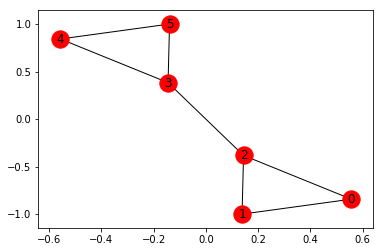

In [2]:
import networkx as nx
import numpy as np
%matplotlib inline

M = ["0,1,2",
"1,0,2",
"2,0,1,3",
"3,2,4,5",
"4,3,5",
"5,3,4"
    ]
G=nx.parse_adjlist(M, nodetype=int, delimiter=",")
nx.draw_networkx(G)

#G = nx.karate_club_graph()
#nx.draw_networkx(G)

In [3]:
for node in [0,1,2]:
    G.nodes[node]['community'] = 0
for node in [3,4,5]:
    G.nodes[node]['community'] = 1

In [24]:
# The community label of a node can be accessed by G[node_id]['community']
# The degree of a node: G.degree[node_id]
# The neighbors of a node: G.neighbors(node_id)
# Number of edges between 2 nodes: G.number_of_edges(node_1, node_2)
def compute_modularity(G):
    m = len(G.edges)
    Q = 0
    
    for node_i in range(len(G.nodes)):
        for node_j in range(len(G.nodes)):
            if G.nodes[node_i]['community'] == G.nodes[node_j]['community']:
                # Effective link
                Aij = G.number_of_edges(node_i, node_j)
                # Outdegrees
                ki = G.degree[node_i] 
                kj = G.degree[node_j]

                Q += Aij - ki*kj / (2*m)
    
    return Q/(2*m)

In [25]:
compute_modularity(G)

0.3571428571428571

In [27]:
from networkx import betweenness_centrality
betweenness_centrality(G,  normalized=False)

{0: 0.0, 1: 0.0, 2: 6.0, 3: 6.0, 4: 0.0, 5: 0.0}

In [30]:
result

{0: 0.0, 1: 0.0, 2: 6.0, 3: 6.0, 4: 0.0, 5: 0.0}

In [33]:
characters = list(G.nodes())
result   = {}

# compute a score fo every character
for n in characters:

    # accumulator for the score of the current character
    accum = 0

    # shortest path FROM every character...
    for i,s in enumerate(characters):
        
        # ..TO every character
        for j,t in enumerate(characters):
            # we do not consider the same path twice
            if j > i:
                continue
            
            try:  
                all_short = nx.all_shortest_paths(G,s,t)
                
                
                ### YOUR CODE HERE ################### 
                shortest_path_through_n = 0
                all_shortest_path = 0
                
                for path in all_short:
                    all_shortest_path += 1
                    if n in path:
                        shortest_path_through_n += 1
                
                if s == t:
                    all_shortest_path = 1
                    
                if n == t or n == s:
                    shortest_path_through_n = 0
                
                accum += shortest_path_through_n / all_shortest_path
                
                
            except nx.NetworkXNoPath:
                continue
                
    result[n] = accum

In [40]:
for i in nx.all_shortest_paths(G,1,5):
    print(i)

[1, 2, 3, 5]


In [64]:
def edge_betweenness_centrality(G):
    edges = list(G.edges())
    nodes = list(G.nodes())
    result   = {}

    # compute a score fo every edge
    for e in edges:

        # accumulator for the score of the current edge
        accum = 0

        # shortest path FROM every character...
        for i,s in enumerate(nodes):

            # ..TO every character
            for j,t in enumerate(nodes):
                # we do not consider the same path twice
                if j > i:
                    continue

                try:  
                    all_short = nx.all_shortest_paths(G,s,t)

                    shortest_path_through_e = 0
                    all_shortest_path = 0

                    for path in all_short:
                        all_shortest_path += 1
                        if (e[0] in path) and (e[1] in path):
                            shortest_path_through_e += 1
                    
                    accum += float(shortest_path_through_e) / float(all_shortest_path)


                except nx.NetworkXNoPath:
                    continue

        result[e] = accum
    return result

In [65]:
edge_betweenness_centrality(G)

{(0, 1): 1.0,
 (0, 2): 4.0,
 (1, 2): 4.0,
 (2, 3): 9.0,
 (3, 4): 4.0,
 (3, 5): 4.0,
 (4, 5): 1.0}

In [62]:
nx.edge_betweenness_centrality(G, normalized=False)

{(0, 1): 1.0,
 (0, 2): 4.0,
 (1, 2): 4.0,
 (2, 3): 9.0,
 (3, 4): 4.0,
 (3, 5): 4.0,
 (4, 5): 1.0}

In [70]:
def _without_most_central_edges(G, most_valuable_edge):
    """Returns the connected components of the graph that results from
    repeatedly removing the most "valuable" edge in the graph.

    `G` must be a non-empty graph. This function modifies the graph `G`
    in-place; that is, it removes edges on the graph `G`.

    `most_valuable_edge` is a function that takes the graph `G` as input
    (or a subgraph with one or more edges of `G` removed) and returns an
    edge. That edge will be removed and this process will be repeated
    until the number of connected components in the graph increases.

    """
    original_num_components = nx.number_connected_components(G)
    num_new_components = original_num_components
    
    while num_new_components <= original_num_components:
        edge = most_valuable_edge(G)
        G.remove_edge(*edge)
        new_components = tuple(nx.connected_components(G))
        num_new_components = len(new_components)
    return new_components

def girvan_newman(G):
# If the graph is already empty, simply return its connected
    # components.
    if G.number_of_edges() == 0:
        yield tuple(nx.connected_components(G))
        return
    # If no function is provided for computing the most valuable edge,
    # use the edge betweenness centrality.
    if most_valuable_edge is None:
        def most_valuable_edge(G):
            """Returns the edge with the highest betweenness centrality
            in the graph `G`.

            """
            # We have guaranteed that the graph is non-empty, so this
            # dictionary will never be empty.
            betweenness = nx.edge_betweenness_centrality(G)
            return max(betweenness, key=betweenness.get)
        
    # The copy of G here must include the edge weight data.
    g = G.copy().to_undirected()
    # Self-loops must be removed because their removal has no effect on
    # the connected components of the graph.
    g.remove_edges_from(nx.selfloop_edges(g))
    while g.number_of_edges() > 0:
        yield _without_most_central_edges(g, most_valuable_edge)
        


In [72]:
girvan_newman(G)

<generator object girvan_newman at 0xa1d182db0>

In [76]:
from networkx.algorithms.community.centrality import girvan_newman

aa = girvan_newman(G)

In [78]:
next(aa)

StopIteration: 

## Question 2

Suppose that you have an undirected social graph G = (U, V), where U - set of nodes, V - set of edges.

<img src="graph.png" width="400">

#### Question

Compute betweenness for the graph G and output the communities for the following betweenness threshold : 4, 6.